In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error

GPU Check

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

# Optionally print device name for verification
if len(physical_devices) > 0:
    print("GPU device name: ", physical_devices[0])

Num GPUs Available:  1
GPU device name:  PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


*****
**Loading & Visualizing Training Dataset**

In [4]:
X = np.load('/content/handsignX.npy')
y = np.load('/content/handsigny.npy')

print('The first element of X is:', X[0])
print('The first element of y is:', y[0,0])
print ('The last element of y is:', y[-1,0])
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The first element of X is: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

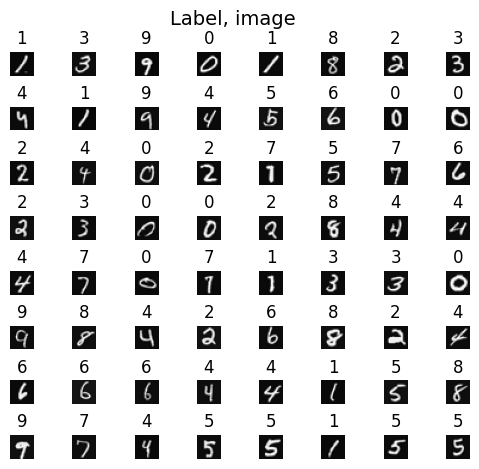

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

*****
**Model Design and Training**

In [6]:
#Neural Network
tf.random.set_seed(1234) # for consistent results

model = Sequential([
    tf.keras.Input(shape=(400,)),
    Dense(units=25, activation='relu', kernel_regularizer=regularizers.l2(0.01), name='hidden_layer1'),
    Dense(units=15, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='hidden_layer2'),
    Dense(units=10, activation='linear')
])
model.summary()

# model training
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=SparseCategoricalCrossentropy(from_logits=True)
)

model.fit(
    X, y,
    batch_size=500,
    epochs=500,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='loss',
            patience=500,
            restore_best_weights=True
        )
    ]
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer1 (Dense)                │ (None, 25)                  │          10,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer2 (Dense)                │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.7698
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5685  
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3643 
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1535 
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9484 
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7502 
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5634 
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3949 
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2488 
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1292 
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0346 
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9607 
Epoch 13/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9019 
Epoch 14/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8540 
Epoch 15/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

Inference for single instance

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


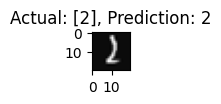

In [7]:
image_of_two = X[1015]
fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
X_reshaped = image_of_two.reshape((20,20)).T

# Display the image
ax.imshow(X_reshaped, cmap='gray')

prediction = model.predict(image_of_two.reshape(1,400))  # prediction
#print(f" predicting a Two: \n{prediction}")
#print(f" Largest Prediction index: {np.argmax(prediction)}")

prediction_p = tf.nn.softmax(prediction)
# print(f" predicting a Two. Probability vector: \n{prediction_p}")
# print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

yhat = np.argmax(prediction_p)
# print(f"np.argmax(prediction_p): {yhat}")

ax.set_title(f"Actual: {y[1015]}, Prediction: {yhat}")
plt.show()

Random Prediction from Training Dataset

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

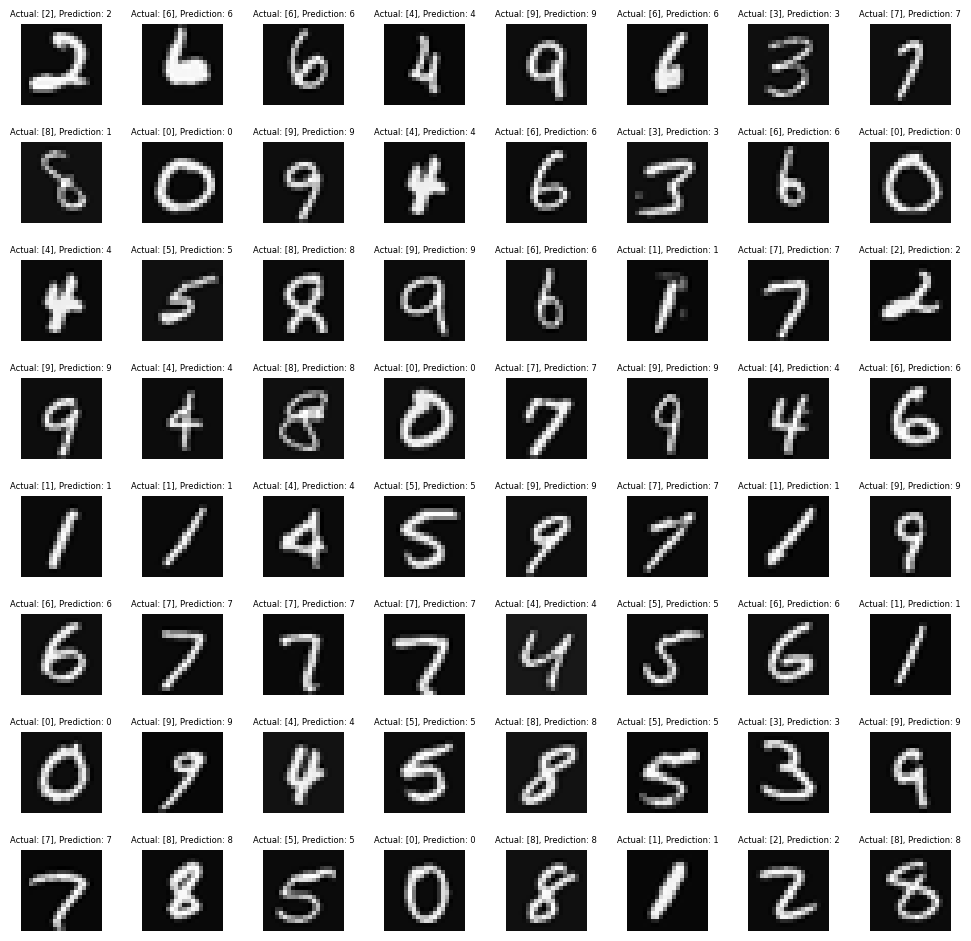

In [8]:
fig, axes = plt.subplots(8,8, figsize=(12,12))
#fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
  index = np.random.randint(m)
  X_reshaped_random = X[index].reshape((20,20)).T

  # Display the image
  ax.imshow(X_reshaped_random, cmap='gray')

  prediction = model.predict(X[index].reshape(1,400))  # prediction
  #print(f" predicting a Two: \n{prediction}")
  #print(f" Largest Prediction index: {np.argmax(prediction)}")

  prediction_p = tf.nn.softmax(prediction)
  # print(f" predicting a Two. Probability vector: \n{prediction_p}")
  # print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

  yhat = np.argmax(prediction_p)
  # print(f"np.argmax(prediction_p): {yhat}")

  ax.set_title(f"Actual: {y[index]}, Prediction: {yhat}", fontsize=6)
  ax.set_axis_off()

fig.subplots_adjust(wspace=0.5, hspace=0.2)
plt.show()

In [9]:
# finding training dataset prediction accuracy for each class
predictions = model.predict(X)
predicted_labels = np.argmax(predictions, axis=1)

per_class_accuracy_list = []

for i in range(10):
    class_indices = np.where(y == i)[0]
    class_accuracy = accuracy_score(y[class_indices], predicted_labels[class_indices])
    per_class_accuracy_list.append([i, class_accuracy])

for class_accuracy in per_class_accuracy_list:
    print(f"Class {class_accuracy[0]}: {class_accuracy[1] * 100:.2f}%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Class 0: 99.80%
Class 1: 99.40%
Class 2: 99.40%
Class 3: 98.20%
Class 4: 99.00%
Class 5: 98.60%
Class 6: 100.00%
Class 7: 99.00%
Class 8: 97.00%
Class 9: 98.40%


In [10]:
# Calculate Accuracy and MSE of the model
print(f'Accuracy: {accuracy_score(y, predicted_labels)}')
print(f'MSE: {mean_squared_error(y, predicted_labels)}')

Accuracy: 0.9888
MSE: 0.216


*****
**Model Saving & Loading**

In [11]:
model.save('MINST_model.keras')

In [12]:
model = tf.keras.models.load_model('MINST_model.keras')

*****
**Model Testing**

In [13]:
test_data = np.load('Test_X.npy')

scalar = StandardScaler()
scalar.fit(test_data)
test_data = scalar.transform(test_data)

predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Shape of X: (200, 400)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


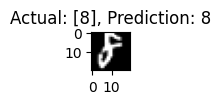

In [14]:
X = np.load('Test_X.npy')
y = np.load('Test_y.npy')

# Check the shape of X
print(f"Shape of X: {X.shape}")

# Assuming X has shape (num_samples, height, width), unpack only the first dimension
m = X.shape[0]  # Number of samples

# Select a random sample
random = np.random.randint(m)
image = X[random]
pre = X[random]  # Assuming you meant X instead of test_data here

# Plot the image
fig, ax = plt.subplots(1, 1, figsize=(0.5, 0.5))
X_reshaped = image.reshape((20, 20)).T  # Adjust reshaping based on your image size

# Display the image
ax.imshow(X_reshaped, cmap='gray')

# Make a prediction (assuming your model expects flattened input)
prediction = model.predict(pre.reshape(1, -1))  # Flatten to 1D if needed for prediction

# Convert to probabilities using softmax
prediction_p = tf.nn.softmax(prediction)

# Get the predicted label
yhat = np.argmax(prediction_p)

# Display the actual and predicted labels
ax.set_title(f"Actual: {y[random]}, Prediction: {yhat}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

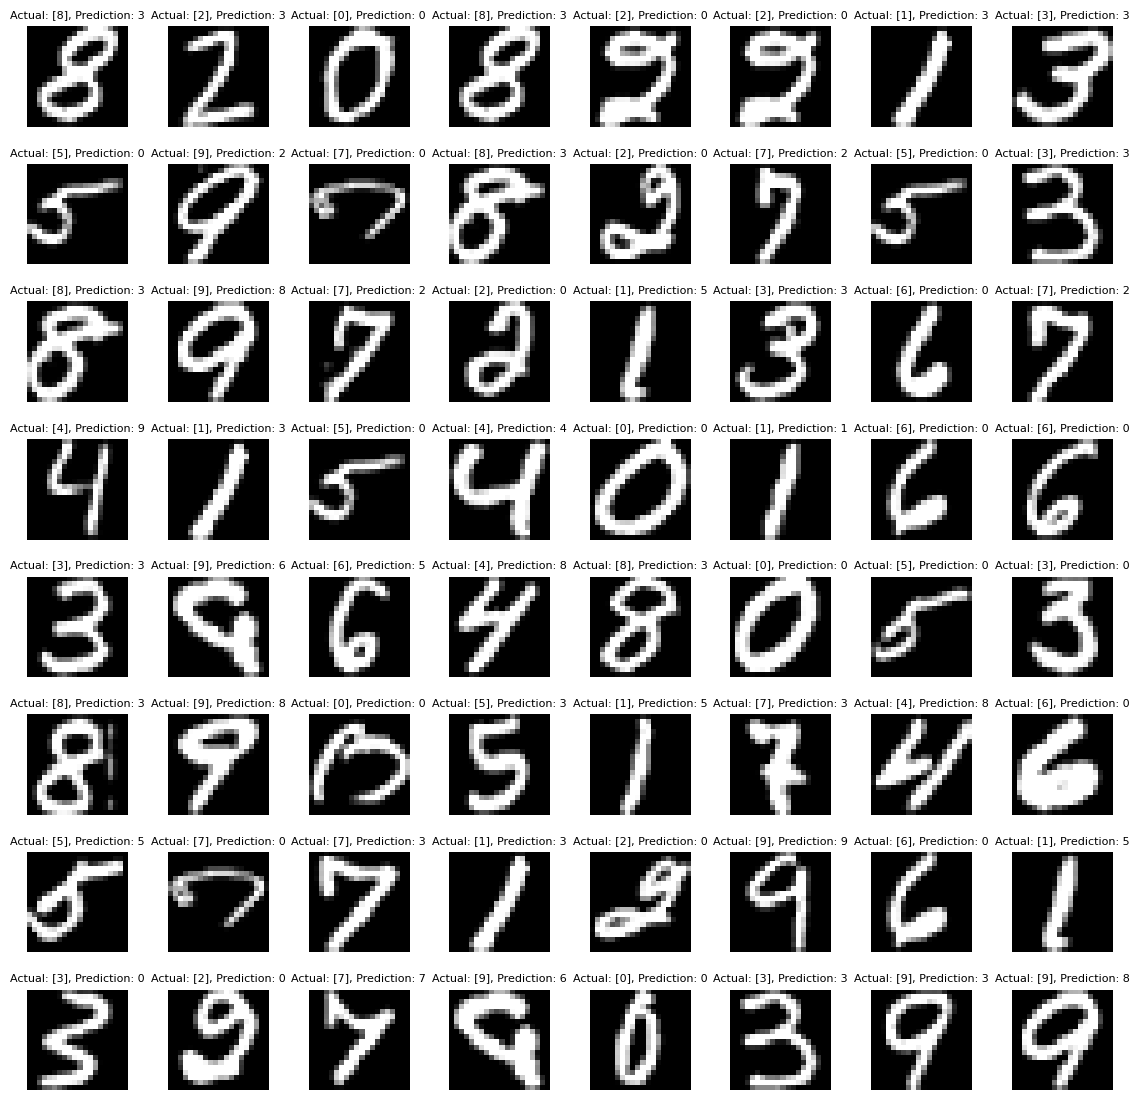

In [15]:
fig, axes = plt.subplots(8,8, figsize=(14,14))
#fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
  index = np.random.randint(m)
  X_reshaped_random = X[index].reshape((20,20)).T

  # Display the image
  ax.imshow(X_reshaped_random, cmap='gray')

  prediction = model.predict(X[index].reshape(1,400))  # prediction
  #print(f" predicting a Two: \n{prediction}")
  #print(f" Largest Prediction index: {np.argmax(prediction)}")

  prediction_p = tf.nn.softmax(prediction)
  # print(f" predicting a Two. Probability vector: \n{prediction_p}")
  # print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

  yhat = np.argmax(prediction_p)
  # print(f"np.argmax(prediction_p): {yhat}")

  ax.set_title(f"Actual: {y[index]}, Prediction: {yhat}", fontsize=8)
  ax.set_axis_off()

fig.subplots_adjust(wspace=0.4, hspace=0.2)
plt.show()

In [16]:
X_reshaped_random = np.load("Test_X.npy")
y = np.load("Test_y.npy")

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

predictions = model.predict(X)
predicted_labels = np.argmax(predictions, axis=1)

per_class_accuracy_list = []

for i in range(10):
    class_indices = np.where(y == i)[0]
    class_accuracy = accuracy_score(y[class_indices], predicted_labels[class_indices])
    per_class_accuracy_list.append([i, class_accuracy])
print("Accuracy")
for class_name, accuracy in per_class_accuracy_list:
    print(f"Class {class_name}: {accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy
Class 0: 30.00%
Class 1: 80.00%
Class 2: 30.00%
Class 3: 30.00%
Class 4: 50.00%
Class 5: 60.00%
Class 6: 10.00%
Class 7: 40.00%
Class 8: 10.00%
Class 9: 10.00%


In [17]:
# Calculate Accuracy and MSE of the model
print(f'Accuracy: {accuracy_score(y, predicted_labels)}')
print(f'MSE: {mean_squared_error(y, predicted_labels)}')

Accuracy: 0.35
MSE: 11.39
